
**┗ 프로모션 A/B Test**
---
> **목차(Context)**

* 프로젝트 Summary
* 문제상황 Introduction

## **프로젝트 Summary**
---

> **프로젝트명**

```
▶ 마케팅 A/B Test
```  

> **프로젝트유형**

```
▶ 마케팅 프로모션에 대한 A/B Test

```

> **학습목표**

```
▶ A/B 테스팅의 원리와 방법에 대한 깊은 이해 습득
▶ 마케팅 프로모션의 효과를 정량적으로 분석하는 능력 개발
▶ 데이터를 통한 가설 설정 및 검증 방법에 대한 숙지
▶ 다양한 통계적 검정방법을 사용하여 테스트 결과의 유의성을 평가하는 능력 향상
```

> **예상 결과물**

```
▶ A/B 테스트 설계 및 실행 계획 문서
▶ 테스트 그룹별 성과 분석 보고서
▶ 통계적 방법을 사용한 테스트 결과의 유의성 검증 결과
▶ 최종적으로 효과적인 마케팅 전략을 위한 추천 방안 및 제안서
```

> **데이터 살펴보기**

|Column|Description|
|:---|:---|
|MarketID|고유 식별자|
|MarketSize|판매량에 따른 시장 영역의 크기|
|LocationID|매장 위치의 고유 식별자|
|AgeOfStore|매장의 연령(설립된 지 몇 년인지)|
|Promotion|테스트된 세 가지 프로모션 중 하나|
|Week|주|
|SalesInThousands|특정 LocationID, Promotion, 그리고 주에 대한 매출액 (천 단위)|




In [2]:
# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

# ▶ 경로 설정 (※강의자료가 위치에 있는 경로 확인)
import os
os.chdir('/content/drive/MyDrive/zerobase/[DA스쿨] 2️ 개인 프로젝트/개인05_유통_마케팅 A-B Test')
os.getcwd()

Mounted at /content/drive


'/content/drive/MyDrive/zerobase/[DA스쿨] 2️ 개인 프로젝트/개인05_유통_마케팅 A-B Test'

In [3]:
# ▶ Data read
import pandas as pd
df = pd.read_csv('P_PJT05_DATA.csv')
df.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
print('df', df.shape)

df (548, 7)


In [ ]:
df.isnull().sum()

MarketID            0
MarketSize          0
LocationID          0
AgeOfStore          0
Promotion           0
week                0
SalesInThousands    0
dtype: int64

In [5]:
#이 마케팅 데이터의 A/B Test는 Promotion을 중심으로 진행된 테스트입니다. Promotion이 1인지, 2인지, 3인지에 따라서 변화하는
#Sales를 중심으로 분석하는 것이 중요하다고 생각합니다. 따라서, 제 개인적인 생각으로는 A/B 테스트를 진행할 때는, Promotion별로 데이터프레임을 나누고
#따로 분석 및 결과를 비교하는 것이 테스트 진행이 더 수월해질 것이라고 생각합니다.



In [ ]:
print('df1', df1.shape), print('df2', df2.shape), print('df3', df3.shape)
#각각의 데이터에는 172, 188, 188개의 데이터가 있는 것을 볼 수 있습니다.

df1 (172, 7)
df2 (188, 7)
df3 (188, 7)


(None, None, None)

In [6]:
df1.value_counts('LocationID')

,count
LocationID,
3,4
711,4
608,4
609,4
610,4
613,4
702,4
703,4
704,4


In [13]:
df.groupby('LocationID')['SalesInThousands'].sum()

,SalesInThousands
LocationID,
1,137.68
2,118.18
3,162.72
4,134.83
5,116.01
6,124.74
7,172.97
8,111.36
9,158.06


#df1,2,3의 분석 그룹별 Sum(Sales) 비교

In [ ]:
df1['SalesInThousands'].sum(), df2['SalesInThousands'].sum(),df3['SalesInThousands'].sum()

(9993.03, 8897.929999999998, 10408.52)

In [ ]:
df1.groupby('MarketSize')['SalesInThousands'].count(), df2.groupby('MarketSize')['SalesInThousands'].count(), df3.groupby('MarketSize')['SalesInThousands'].count()

(MarketSize
 Large     56
 Medium    96
 Small     20
 Name: SalesInThousands, dtype: int64,
 MarketSize
 Large      64
 Medium    108
 Small      16
 Name: SalesInThousands, dtype: int64,
 MarketSize
 Large      48
 Medium    116
 Small      24
 Name: SalesInThousands, dtype: int64)

In [14]:
df.groupby('MarketSize')['SalesInThousands'].mean()

,SalesInThousands
MarketSize,
Large,70.116726
Medium,43.985344
Small,57.409333


In [ ]:

df1.groupby('MarketSize')['SalesInThousands'].mean(), df1.groupby('week')['SalesInThousands'].sum(), df1.groupby('week')['SalesInThousands'].mean()
#AgeOfStore, LocationID의 변수들을 groupby 해 봤을 때에는 데이터의 크기가 다른 분석 데이터들보다 상대적으로 작지만 그룹이 굉장히 많았기 때문에
#Groupby해서 sortvalues를 쓰는 방법을 활용해야 할 것으로 봤습니다. 단순하게 비교하기에는 MarketSize와 week로 비교하는 것이 직관적이었다고 생각합니다.

(MarketSize
 Large     75.235893
 Medium    47.672604
 Small     60.162500
 Name: SalesInThousands, dtype: float64,
 week
 1    2504.51
 2    2447.97
 3    2527.32
 4    2513.23
 Name: SalesInThousands, dtype: float64,
 week
 1    58.244419
 2    56.929535
 3    58.774884
 4    58.447209
 Name: SalesInThousands, dtype: float64)

In [4]:
 df2.groupby('MarketSize')['SalesInThousands'].mean(), df2.groupby('week')['SalesInThousands'].sum(), df2.groupby('week')['SalesInThousands'].mean()

(MarketSize
 Large     60.322031
 Medium    39.114352
 Small     50.810625
 Name: SalesInThousands, dtype: float64,
 week
 1    2243.32
 2    2236.38
 3    2242.94
 4    2175.29
 Name: SalesInThousands, dtype: float64,
 week
 1    47.730213
 2    47.582553
 3    47.722128
 4    46.282766
 Name: SalesInThousands, dtype: float64)

In [ ]:
 df3.groupby('MarketSize')['SalesInThousands'].mean(), df3.groupby('week')['SalesInThousands'].sum(), df3.groupby('week')['SalesInThousands'].mean()
#직관적으로 df2와 df3을 비교했을 때, 모든 부분에서 df2보다 df3의 데이터들의 Sales가 높은 것을 볼 수 있습니다.

(MarketSize
 Large     77.203958
 Medium    45.468879
 Small     59.514167
 Name: SalesInThousands, dtype: float64,
 week
 1    2621.48
 2    2629.61
 3    2555.76
 4    2601.67
 Name: SalesInThousands, dtype: float64,
 week
 1    55.776170
 2    55.949149
 3    54.377872
 4    55.354681
 Name: SalesInThousands, dtype: float64)

- MarketSize를 비교하려고 했을 때, 처음에는 sum을 사용하려 데이터 분석을 진행하려고 했습니다. 하지만, sum을 사용했을 때 나왔던 결과는 Medium Size가 압도적인 성적을 냈는 것을 확인했는데, 이는 mean을 사용했을 때 정확한 분석이 아니었습니다. 그 이유는 평균적으로 Medium Size를 사용하고 있는 매장은 Small Size보다 평균 Sale이 모두가 적다는 것을 확인할 수 있었습니다. 따라서, Medium Size인 매장 중 성적이 낮은 매장들을 확인하여 Small Size로 변화하거나, 정리하는 것이 주요한 요소일 수도 있을 것 같다는 생각을 했습니다.

- Week 변수를 사용했을 때, 눈에 띄게 큰 변화는 일어나지 않았습니다. 따라서, week가 1~4주로 변화할 때마다 변하는 것이 크게 있지 않다고 생각했습니다.

#AgeOfStore 구간화를 이용한 df1~df3의 비교

In [ ]:
df['AgeOfStore'].describe(), df1['AgeOfStore'].describe(), df2['AgeOfStore'].describe(), df3['AgeOfStore'].describe()

(count    548.000000
 mean       8.503650
 std        6.638345
 min        1.000000
 25%        4.000000
 50%        7.000000
 75%       12.000000
 max       28.000000
 Name: AgeOfStore, dtype: float64,
 count    172.00000
 mean       8.27907
 std        6.63616
 min        1.00000
 25%        3.00000
 50%        6.00000
 75%       12.00000
 max       27.00000
 Name: AgeOfStore, dtype: float64,
 count    188.000000
 mean       7.978723
 std        6.597648
 min        1.000000
 25%        3.000000
 50%        7.000000
 75%       10.000000
 max       28.000000
 Name: AgeOfStore, dtype: float64,
 count    188.000000
 mean       9.234043
 std        6.651646
 min        1.000000
 25%        5.000000
 50%        8.000000
 75%       12.000000
 max       24.000000
 Name: AgeOfStore, dtype: float64)

<Axes: xlabel='AgeOfStore', ylabel='Count'>

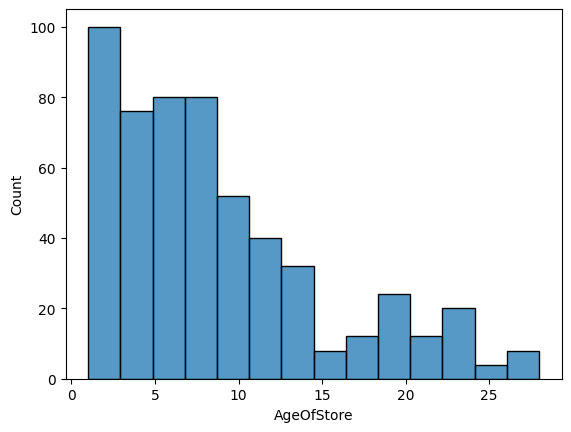

In [24]:
sns.histplot(df['AgeOfStore'])

In [36]:
df['AgeOfStore'].describe(percentiles = [.1, .2, .25, .3, .4, .5, .6, .7, .75, .8, .9]).reset_index()
#AgeOfStore 변수를 4등분을 한다면 1,4,7,12,28,그리고 5등분을 시도한다면 1,3,5,8,13,28 이렇게 나오는데, 5등분을 하는 것을 선택하려고 합니다. 그 이유는
#4등분하는 것이 보기 더 편한 부분이 있기도 하지만, 보통 신규 매장을 1년에서 3년으로 분류하고, 3년에서 5년부터 연차가 쌓이는 것을 표현하기 때문에,
#5등분하는 것이 더 분류할 때 편한 것 같습니다.

,index,AgeOfStore
0,count,548.000000
1,mean,8.503650
2,std,6.638345
3,min,1.000000
4,10%,1.000000
5,20%,3.000000
6,25%,4.000000
7,30%,4.000000
8,40%,5.000000
9,50%,7.000000


In [4]:
df.loc[df['AgeOfStore'] <= 2, 'Age'] = 'New'
df.loc[(df['AgeOfStore'] > 2) & (df['AgeOfStore'] <= 5), 'Age'] = 'Junior'
df.loc[(df['AgeOfStore'] > 5) & (df['AgeOfStore'] <= 8), 'Age'] = 'Senior'
df.loc[(df['AgeOfStore'] > 8) & (df['AgeOfStore'] <= 13), 'Age'] = 'Veteran'
df.loc[(df['AgeOfStore'] > 13), 'Age'] = 'Master'

#1,3,5,8,13

In [5]:
df1 = df[df['Promotion'] == 1]
df2 = df[df['Promotion'] == 2]
df3 = df[df['Promotion'] == 3]

In [63]:
df.value_counts('Age') # 1,2,5,8,13

,count
Age,
Junior,120
Senior,116
Veteran,112
Master,100
New,100


In [39]:
df.value_counts('Age') #1,3,5,8,13

,count
Age,
New,132
Senior,116
Veteran,112
Master,100
Junior,88


In [55]:
df.value_counts('Age')

,count
Age,
Junior,120
Senior,116
Veteran,112
Master,100
New,100


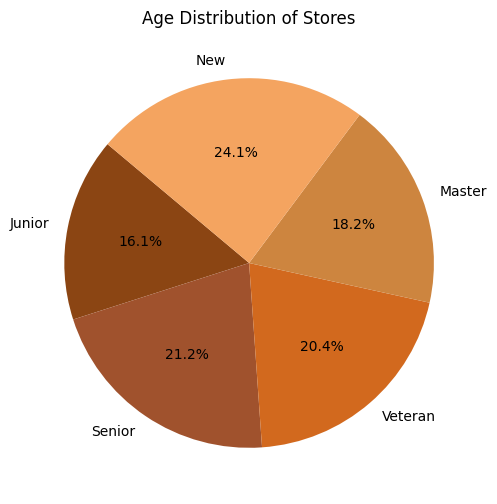

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



# 데이터 준비
data = {
    'Age': ['Junior', 'Senior', 'Veteran', 'Master', 'New'],
    'Count': [88, 116, 112, 100, 132]
}

df5 = pd.DataFrame(data)
# 갈색 계열 색상 팔레트 설정
colors = ['#8B4513', '#A0522D', '#D2691E', '#CD853F', '#F4A460']
# 파이 차트 시각화
plt.figure(figsize=(10, 6))
plt.pie(df5['Count'], labels=df5['Age'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Age Distribution of Stores')
plt.show()

In [6]:
df1 = df[df['Promotion'] == 1]
df2 = df[df['Promotion'] == 2]
df3 = df[df['Promotion'] == 3]
df1.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands,Age
8,1,Medium,3,12,1,1,44.54,Veteran
9,1,Medium,3,12,1,2,37.94,Veteran
10,1,Medium,3,12,1,3,45.49,Veteran
11,1,Medium,3,12,1,4,34.75,Veteran
24,1,Medium,7,15,1,1,42.92,Master


In [67]:
df1.drop('AgeOfStore', axis = 1, inplace = True)
df2.drop('AgeOfStore', axis = 1, inplace = True)
df3.drop('AgeOfStore', axis = 1, inplace = True)

In [65]:
df1.groupby('Age')['SalesInThousands'].sum(), df1.groupby('Age')['SalesInThousands'].mean()

(Age
 Junior     2340.26
 Master     1649.63
 New        2187.65
 Senior     2024.71
 Veteran    1790.78
 Name: SalesInThousands, dtype: float64,
 Age
 Junior     58.506500
 Master     58.915357
 New        68.364063
 Senior     56.241944
 Veteran    49.743889
 Name: SalesInThousands, dtype: float64)

In [30]:
df2.groupby('Age')['SalesInThousands'].sum(), df2.groupby('Age')['SalesInThousands'].mean()

(Age
 Junior     1529.28
 Master     1560.32
 New        2132.55
 Senior     1840.87
 Veteran    1834.91
 Name: SalesInThousands, dtype: float64,
 Age
 Junior     42.480000
 Master     48.760000
 New        48.467045
 Senior     51.135278
 Veteran    45.872750
 Name: SalesInThousands, dtype: float64)

In [31]:
df3.groupby('Age')['SalesInThousands'].sum(), df3.groupby('Age')['SalesInThousands'].mean()

(Age
 Junior     2557.02
 Master     2290.34
 New        1536.64
 Senior     2087.80
 Veteran    1936.72
 Name: SalesInThousands, dtype: float64,
 Age
 Junior     58.114091
 Master     57.258500
 New        64.026667
 Senior     47.450000
 Veteran    53.797778
 Name: SalesInThousands, dtype: float64)

- Age 구간별 비교.
Sales 합계를 분석하려고 했을 때, 문제점은 각 구간 당 마켓의 개수가 일치하지
않는다는 것이었습니다. 따라서, 각 구간 별 평균을 구해서 알아보려고 했습니다. 가장 먼저 df1은 8년차에서 13년차까지의 마켓의 평균 매출이 가장 낮게 나온 그룹입니다. df2는 4년차에서 5년차까지의 마켓 평균이 낮게 나왔습니다. df3은 6년차에서 8년차까지의 마켓 평균이 낮게 나왔습니다. df1과 df3의 공통점 중 하나는 1년차에서 3년차까지의 마켓의 평균이 가장 높게 나왔다는 점입니다. 이 것은 신규 매장에 promotion1과 promotion2를 쓰면 좋은 성적을 낼 수도 있다는 인사이트를 줄 수 있습니다.

# 가설1: 비교적 매장 오픈한지 얼마 안 된 매장(5년 이하)들의 프로모션 효과가 더 많이 나타날 것이다.   

In [12]:
df1.groupby('Age')['SalesInThousands'].sum(), df1.groupby('Age')['SalesInThousands'].mean()

(Age
 Junior     1279.92
 Master     1649.63
 New        3247.99
 Senior     2024.71
 Veteran    1790.78
 Name: SalesInThousands, dtype: float64,
 Age
 Junior     53.330000
 Master     58.915357
 New        67.666458
 Senior     56.241944
 Veteran    49.743889
 Name: SalesInThousands, dtype: float64)

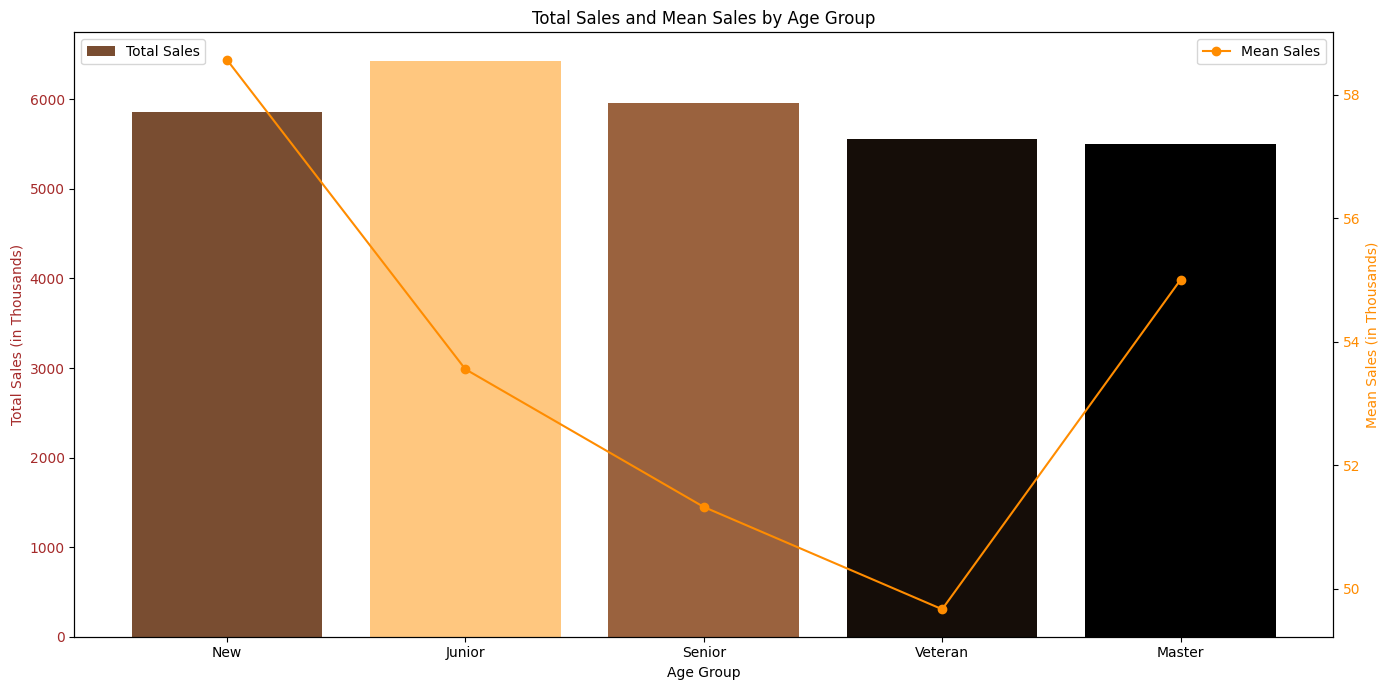

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable, get_cmap

# 데이터 준비
total_sales = df.groupby('Age')['SalesInThousands'].sum()
mean_sales = df.groupby('Age')['SalesInThousands'].mean()
sales_order = ['New', 'Junior', 'Senior', 'Veteran', 'Master']
total_sales = total_sales.reindex(sales_order)
mean_sales = mean_sales.reindex(sales_order)

# 데이터프레임을 생성합니다.
df_total_sales = total_sales.reset_index()
df_total_sales.columns = ['Age', 'TotalSales']

df_mean_sales = mean_sales.reset_index()
df_mean_sales.columns = ['Age', 'MeanSales']

# 색상 팔레트 설정 (갈색 계열)
cmap = get_cmap('copper')  # 'copper'는 갈색 계열 색상 맵입니다.

# Normalization 설정 (색상 범위 조정)
norm_total_sales = Normalize(vmin=total_sales.min(), vmax=total_sales.max())
norm_mean_sales = Normalize(vmin=mean_sales.min(), vmax=mean_sales.max())

# 색상 매핑 (검은색이 아닌 갈색 계열로 보장)
colors_total_sales = [cmap(norm_total_sales(value)) for value in total_sales]
colors_mean_sales = [cmap(norm_mean_sales(value)) for value in mean_sales]

# 시각화를 시작합니다.
fig, ax1 = plt.subplots(figsize=(14, 7))

# 총 판매량 시각화
bars = ax1.bar(df_total_sales['Age'], df_total_sales['TotalSales'], color=colors_total_sales, label='Total Sales')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Total Sales (in Thousands)', color='brown')
ax1.tick_params(axis='y', labelcolor='brown')

# 평균 판매량 시각화 (twinx로 두 번째 y축 추가)
ax2 = ax1.twinx()
line = ax2.plot(df_mean_sales['Age'], df_mean_sales['MeanSales'], marker='o', color='darkorange', label='Mean Sales')
ax2.set_ylabel('Mean Sales (in Thousands)', color='darkorange')
ax2.tick_params(axis='y', labelcolor='darkorange')

# 범례 추가
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Total Sales and Mean Sales by Age Group')
plt.tight_layout()
plt.show()


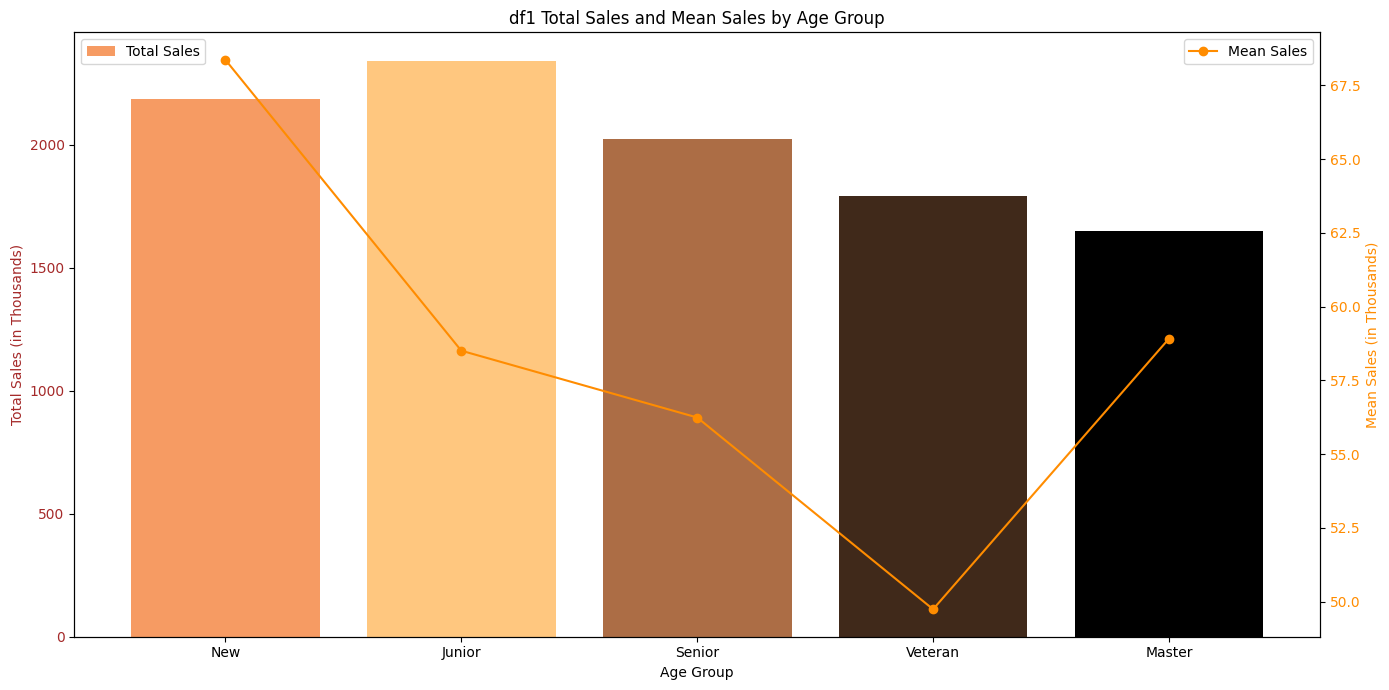

In [78]:
# 데이터 준비
total_sales = df1.groupby('Age')['SalesInThousands'].sum()
mean_sales = df1.groupby('Age')['SalesInThousands'].mean()
sales_order = ['New', 'Junior', 'Senior', 'Veteran', 'Master']
total_sales = total_sales.reindex(sales_order)
mean_sales = mean_sales.reindex(sales_order)

# 데이터프레임을 생성합니다.
df_total_sales = total_sales.reset_index()
df_total_sales.columns = ['Age', 'TotalSales']

df_mean_sales = mean_sales.reset_index()
df_mean_sales.columns = ['Age', 'MeanSales']

# 색상 팔레트 설정 (갈색 계열)
cmap = get_cmap('copper')  # 'copper'는 갈색 계열 색상 맵입니다.

# Normalization 설정 (색상 범위 조정)
norm_total_sales = Normalize(vmin=total_sales.min(), vmax=total_sales.max())
norm_mean_sales = Normalize(vmin=mean_sales.min(), vmax=mean_sales.max())

# 색상 매핑 (검은색이 아닌 갈색 계열로 보장)
colors_total_sales = [cmap(norm_total_sales(value)) for value in total_sales]
colors_mean_sales = [cmap(norm_mean_sales(value)) for value in mean_sales]

# 시각화를 시작합니다.
fig, ax1 = plt.subplots(figsize=(14, 7))

# 총 판매량 시각화
bars = ax1.bar(df_total_sales['Age'], df_total_sales['TotalSales'], color=colors_total_sales, label='Total Sales')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Total Sales (in Thousands)', color='brown')
ax1.tick_params(axis='y', labelcolor='brown')

# 평균 판매량 시각화 (twinx로 두 번째 y축 추가)
ax2 = ax1.twinx()
line = ax2.plot(df_mean_sales['Age'], df_mean_sales['MeanSales'], marker='o', color='darkorange', label='Mean Sales')
ax2.set_ylabel('Mean Sales (in Thousands)', color='darkorange')
ax2.tick_params(axis='y', labelcolor='darkorange')

# 범례 추가
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('df1 Total Sales and Mean Sales by Age Group')
plt.tight_layout()
plt.show()



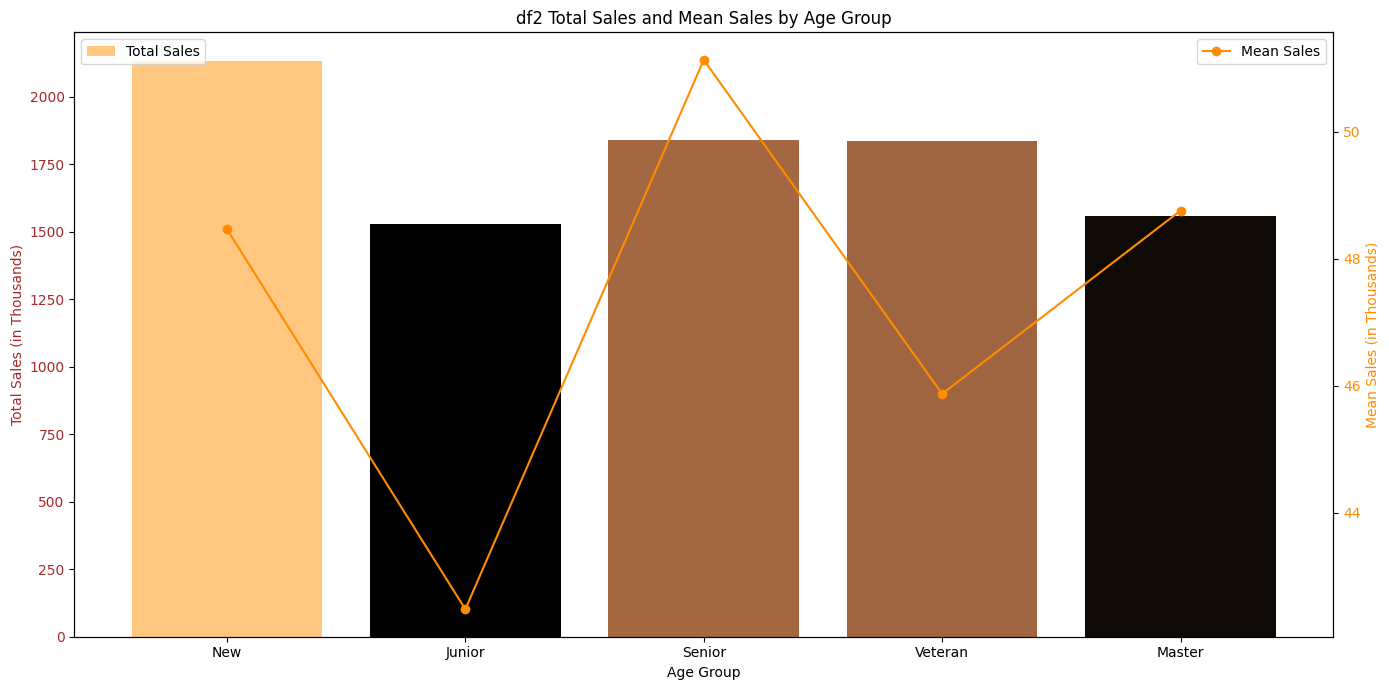

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable, get_cmap

# 데이터 준비
total_sales = df2.groupby('Age')['SalesInThousands'].sum()
mean_sales = df2.groupby('Age')['SalesInThousands'].mean()
sales_order = ['New', 'Junior', 'Senior', 'Veteran', 'Master']
total_sales = total_sales.reindex(sales_order)
mean_sales = mean_sales.reindex(sales_order)

# 데이터프레임을 생성합니다.
df_total_sales = total_sales.reset_index()
df_total_sales.columns = ['Age', 'TotalSales']

df_mean_sales = mean_sales.reset_index()
df_mean_sales.columns = ['Age', 'MeanSales']

# 색상 팔레트 설정 (갈색 계열)
cmap = get_cmap('copper')  # 'copper'는 갈색 계열 색상 맵입니다.

# Normalization 설정 (색상 범위 조정)
norm_total_sales = Normalize(vmin=total_sales.min(), vmax=total_sales.max())
norm_mean_sales = Normalize(vmin=mean_sales.min(), vmax=mean_sales.max())

# 색상 매핑 (검은색이 아닌 갈색 계열로 보장)
colors_total_sales = [cmap(norm_total_sales(value)) for value in total_sales]
colors_mean_sales = [cmap(norm_mean_sales(value)) for value in mean_sales]

# 시각화를 시작합니다.
fig, ax1 = plt.subplots(figsize=(14, 7))

# 총 판매량 시각화
bars = ax1.bar(df_total_sales['Age'], df_total_sales['TotalSales'], color=colors_total_sales, label='Total Sales')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Total Sales (in Thousands)', color='brown')
ax1.tick_params(axis='y', labelcolor='brown')

# 평균 판매량 시각화 (twinx로 두 번째 y축 추가)
ax2 = ax1.twinx()
line = ax2.plot(df_mean_sales['Age'], df_mean_sales['MeanSales'], marker='o', color='darkorange', label='Mean Sales')
ax2.set_ylabel('Mean Sales (in Thousands)', color='darkorange')
ax2.tick_params(axis='y', labelcolor='darkorange')

# 범례 추가
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('df2 Total Sales and Mean Sales by Age Group')
plt.tight_layout()
plt.show()


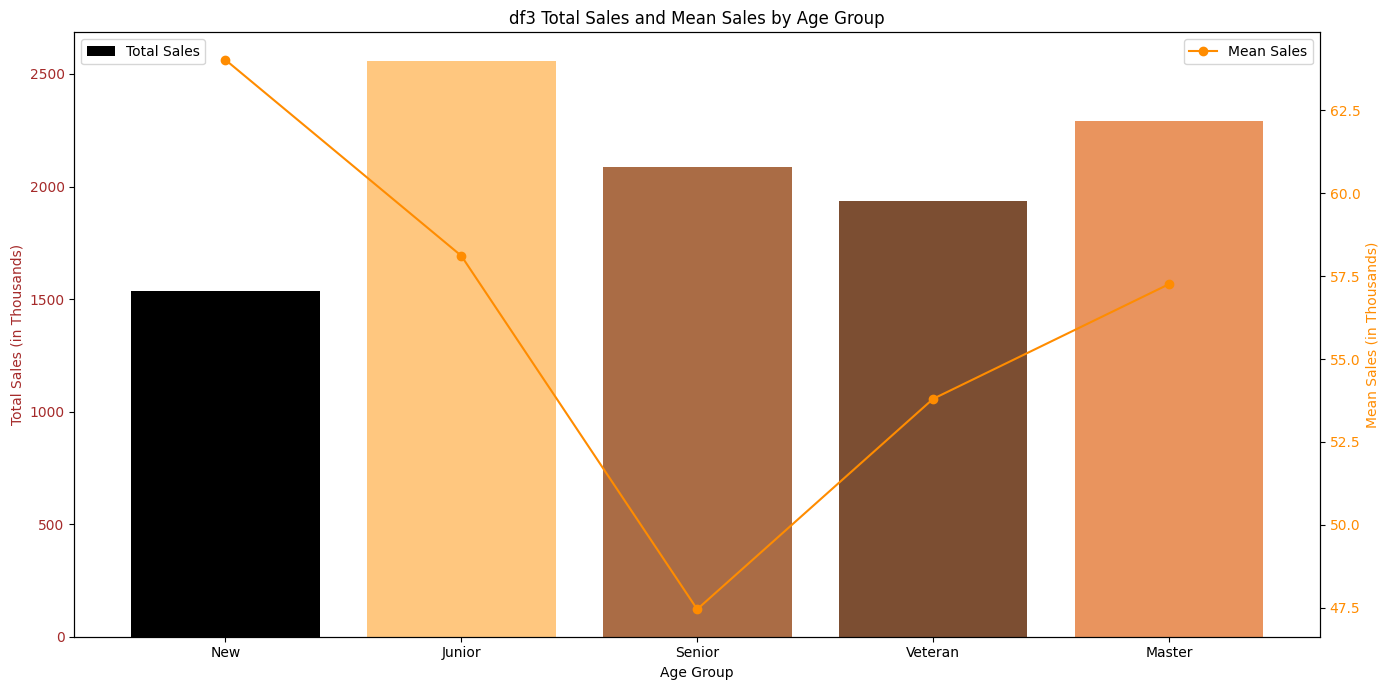

In [80]:

# 데이터 준비
total_sales = df3.groupby('Age')['SalesInThousands'].sum()
mean_sales = df3.groupby('Age')['SalesInThousands'].mean()
sales_order = ['New', 'Junior', 'Senior', 'Veteran', 'Master']
total_sales = total_sales.reindex(sales_order)
mean_sales = mean_sales.reindex(sales_order)

# 데이터프레임을 생성합니다.
df_total_sales = total_sales.reset_index()
df_total_sales.columns = ['Age', 'TotalSales']

df_mean_sales = mean_sales.reset_index()
df_mean_sales.columns = ['Age', 'MeanSales']

# 색상 팔레트 설정 (갈색 계열)
cmap = get_cmap('copper')  # 'copper'는 갈색 계열 색상 맵입니다.

# Normalization 설정 (색상 범위 조정)
norm_total_sales = Normalize(vmin=total_sales.min(), vmax=total_sales.max())
norm_mean_sales = Normalize(vmin=mean_sales.min(), vmax=mean_sales.max())

# 색상 매핑 (검은색이 아닌 갈색 계열로 보장)
colors_total_sales = [cmap(norm_total_sales(value)) for value in total_sales]
colors_mean_sales = [cmap(norm_mean_sales(value)) for value in mean_sales]

# 시각화를 시작합니다.
fig, ax1 = plt.subplots(figsize=(14, 7))

# 총 판매량 시각화
bars = ax1.bar(df_total_sales['Age'], df_total_sales['TotalSales'], color=colors_total_sales, label='Total Sales')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Total Sales (in Thousands)', color='brown')
ax1.tick_params(axis='y', labelcolor='brown')

# 평균 판매량 시각화 (twinx로 두 번째 y축 추가)
ax2 = ax1.twinx()
line = ax2.plot(df_mean_sales['Age'], df_mean_sales['MeanSales'], marker='o', color='darkorange', label='Mean Sales')
ax2.set_ylabel('Mean Sales (in Thousands)', color='darkorange')
ax2.tick_params(axis='y', labelcolor='darkorange')

# 범례 추가
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('df3 Total Sales and Mean Sales by Age Group')
plt.tight_layout()
plt.show()


# 가설2: 각 프로모션을 실행할 때 프로모션에 관한 소문이 퍼지기 시작한 2번째 주부터 매출이 증가할 것이다.  

In [19]:
df.groupby('week')['SalesInThousands'].sum(), df.groupby('week')['SalesInThousands'].mean()

(week
 1    7369.31
 2    7313.96
 3    7326.02
 4    7290.19
 Name: SalesInThousands, dtype: float64,
 week
 1    53.790584
 2    53.386569
 3    53.474599
 4    53.213066
 Name: SalesInThousands, dtype: float64)

In [20]:
df1.groupby('week')['SalesInThousands'].sum(), df1.groupby('week')['SalesInThousands'].mean()

(week
 1    2504.51
 2    2447.97
 3    2527.32
 4    2513.23
 Name: SalesInThousands, dtype: float64,
 week
 1    58.244419
 2    56.929535
 3    58.774884
 4    58.447209
 Name: SalesInThousands, dtype: float64)

In [21]:
df2.groupby('week')['SalesInThousands'].sum(), df2.groupby('week')['SalesInThousands'].mean()

(week
 1    2243.32
 2    2236.38
 3    2242.94
 4    2175.29
 Name: SalesInThousands, dtype: float64,
 week
 1    47.730213
 2    47.582553
 3    47.722128
 4    46.282766
 Name: SalesInThousands, dtype: float64)

In [22]:
df3.groupby('week')['SalesInThousands'].sum(), df3.groupby('week')['SalesInThousands'].mean()

(week
 1    2621.48
 2    2629.61
 3    2555.76
 4    2601.67
 Name: SalesInThousands, dtype: float64,
 week
 1    55.776170
 2    55.949149
 3    54.377872
 4    55.354681
 Name: SalesInThousands, dtype: float64)

주간의 매출 차이는 크게 나타나지는 않아 보인다. 오히려 1주차 때 가장 많고 시간이 갈 수록 매출은 감소하는 것으로 보인다. 따라서, 실질적인 주간 매출의 차이를 위해 다양한 방법을 통해 알아볼 것이다.

In [24]:
df1.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands,Age
8,1,Medium,3,12,1,1,44.54,Veteran
9,1,Medium,3,12,1,2,37.94,Veteran
10,1,Medium,3,12,1,3,45.49,Veteran
11,1,Medium,3,12,1,4,34.75,Veteran
24,1,Medium,7,15,1,1,42.92,Master


In [26]:
df1.groupby(['Age','week'])['SalesInThousands'].mean(), df2.groupby(['Age','week'])['SalesInThousands'].mean(), df3.groupby(['Age','week'])['SalesInThousands'].mean()

(Age      week
 Junior   1       59.214000
          2       54.454000
          3       64.322000
          4       56.036000
 Master   1       58.660000
          2       57.338571
          3       63.622857
          4       56.040000
 New      1       68.097500
          2       68.041250
          3       66.973750
          4       70.343750
 Senior   1       57.457778
          2       57.034444
          3       51.140000
          4       59.335556
 Veteran  1       48.872222
          2       49.380000
          3       49.187778
          4       51.535556
 Name: SalesInThousands, dtype: float64,
 Age      week
 Junior   1       44.568889
          2       42.091111
          3       42.853333
          4       40.406667
 Master   1       47.701250
          2       50.733750
          3       47.901250
          4       48.703750
 New      1       48.092727
          2       48.422727
          3       48.600909
          4       48.751818
 Senior   1       50.742222
     

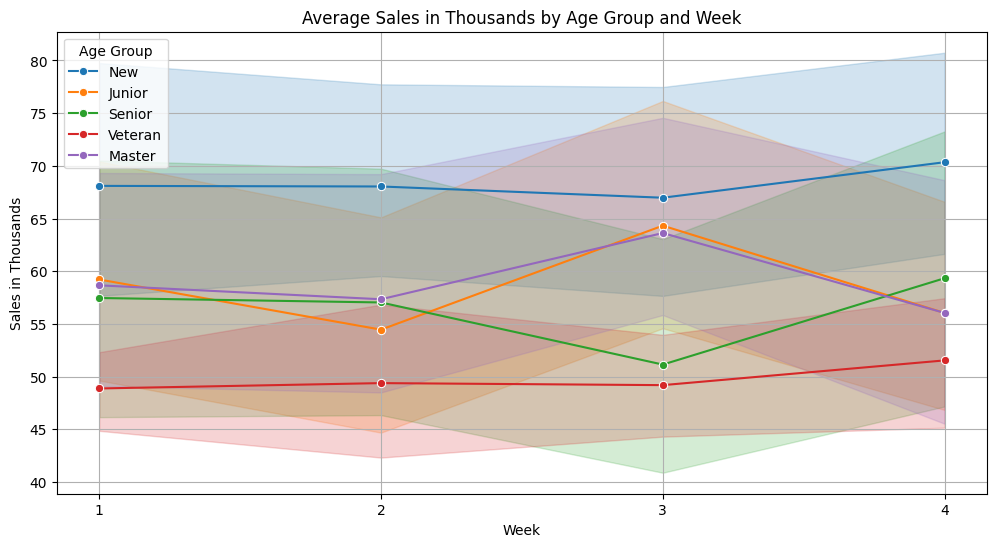

In [8]:

# Seaborn으로 시각화
plt.figure(figsize=(12, 6))
sns.lineplot(data=df1, x='week', y='SalesInThousands', hue='Age', marker='o')
plt.xticks(ticks=[1, 2, 3, 4])

plt.title('Average Sales in Thousands by Age Group and Week')
plt.xlabel('Week')
plt.ylabel('Sales in Thousands')
plt.legend(title='Age Group')
plt.grid(True)
plt.show()

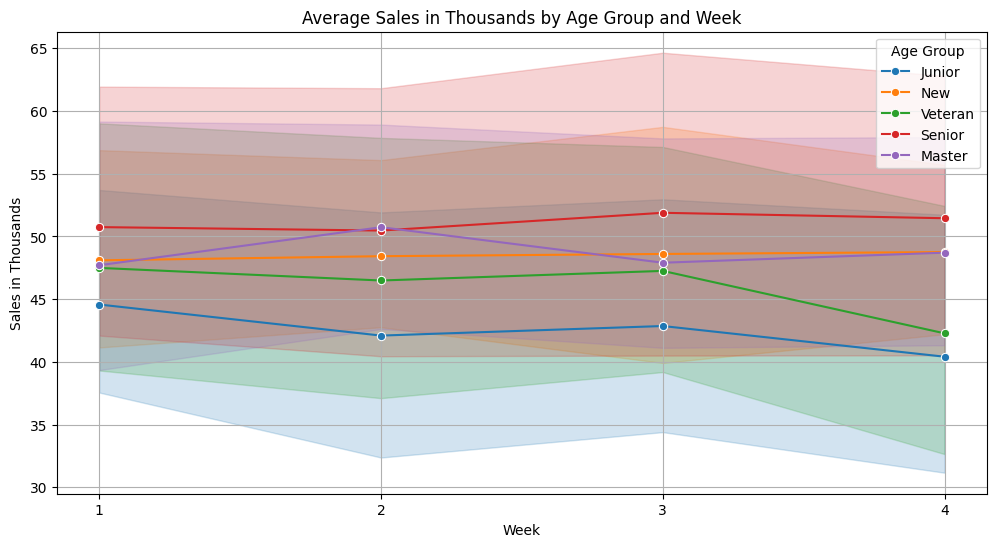

In [36]:
# Seaborn으로 시각화
plt.figure(figsize=(12, 6))
sns.lineplot(data=df2, x='week', y='SalesInThousands', hue='Age', marker='o')
plt.xticks(ticks=[1, 2, 3, 4])

plt.title('Average Sales in Thousands by Age Group and Week')
plt.xlabel('Week')
plt.ylabel('Sales in Thousands')
plt.legend(title='Age Group')
plt.grid(True)
plt.show()

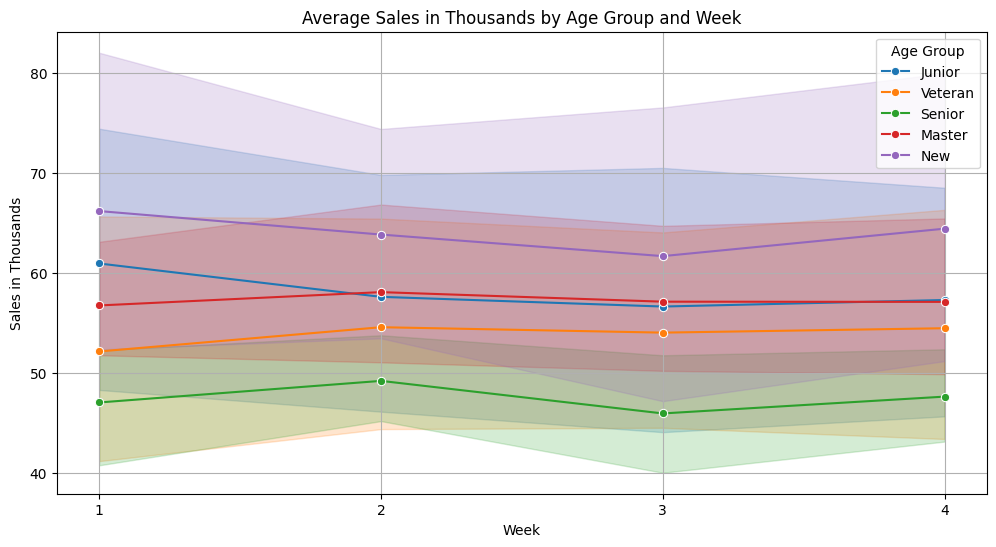

In [37]:
# Seaborn으로 시각화
plt.figure(figsize=(12, 6))
sns.lineplot(data=df3, x='week', y='SalesInThousands', hue='Age', marker='o')
plt.xticks(ticks=[1, 2, 3, 4])

plt.title('Average Sales in Thousands by Age Group and Week')
plt.xlabel('Week')
plt.ylabel('Sales in Thousands')
plt.legend(title='Age Group')
plt.grid(True)
plt.show()

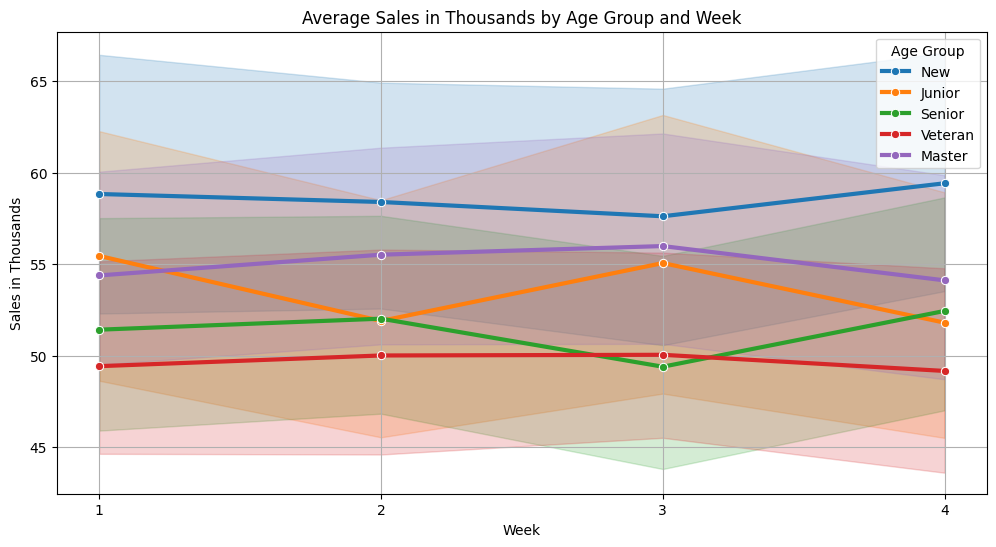

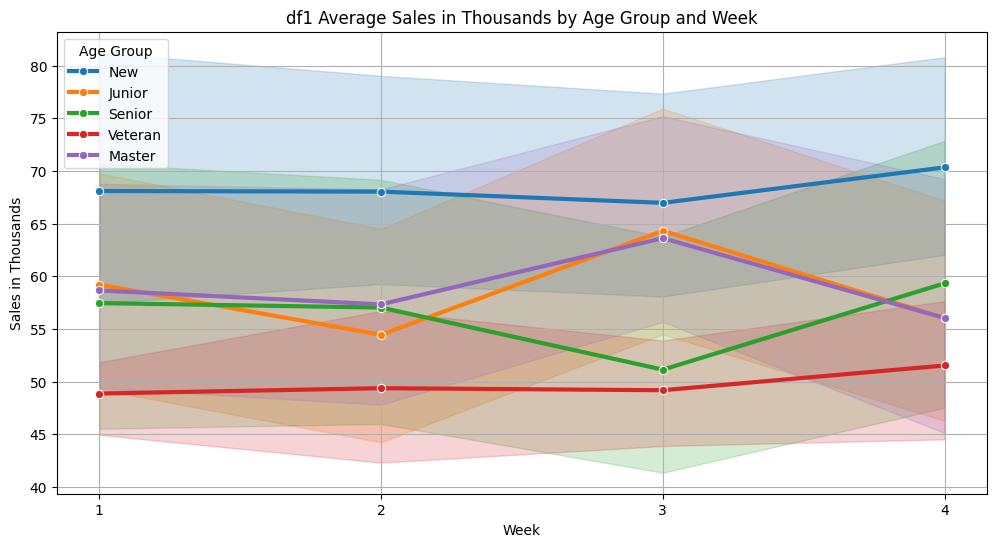

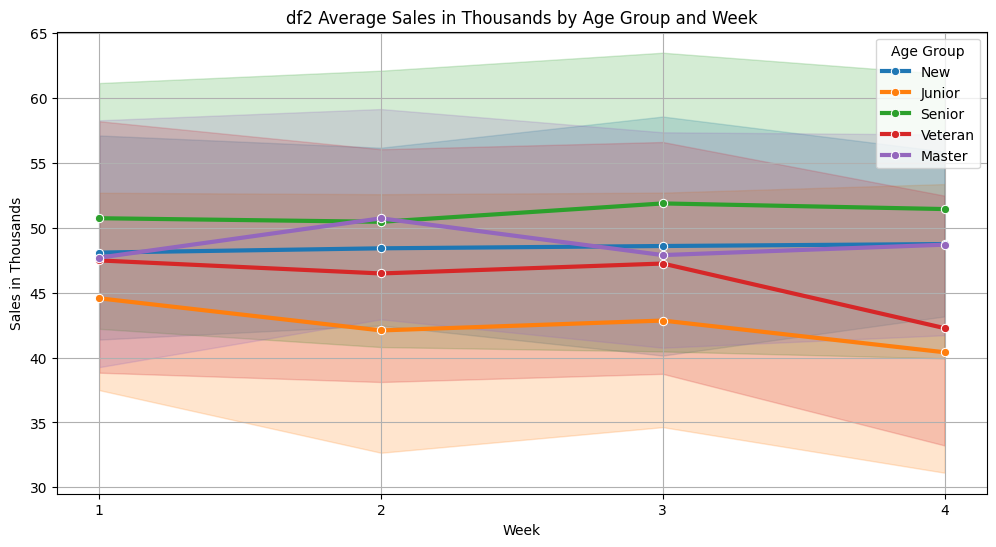

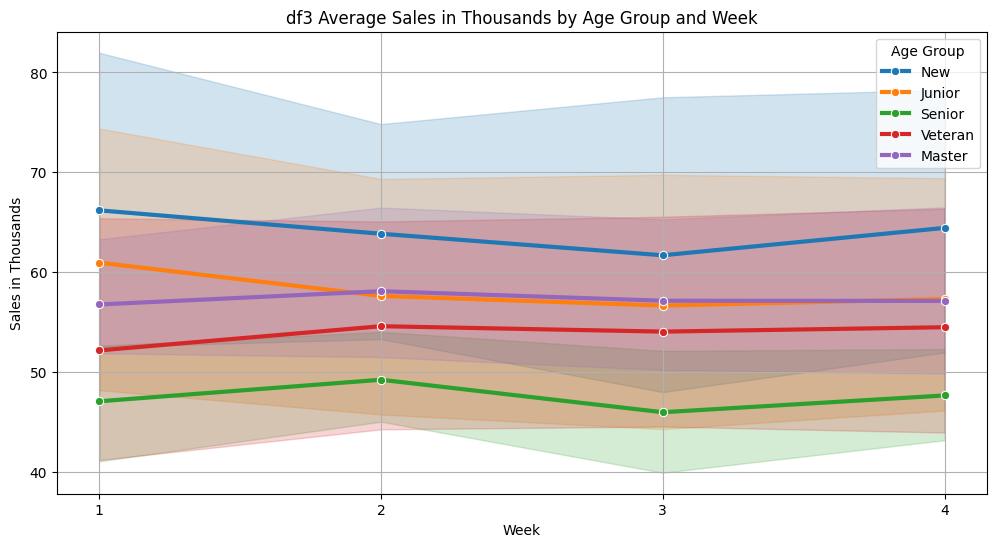

In [9]:
age_order = ['New', 'Junior', 'Senior', 'Veteran', 'Master']
df['Age'] = pd.Categorical(df['Age'], categories = age_order, ordered = True)
df1['Age'] = pd.Categorical(df1['Age'], categories=age_order, ordered=True)
df2['Age'] = pd.Categorical(df2['Age'], categories=age_order, ordered=True)
df3['Age'] = pd.Categorical(df3['Age'], categories=age_order, ordered=True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='week', y='SalesInThousands', hue='Age', marker='o', linewidth=3)

# x축 눈금을 1, 2, 3, 4로 설정
plt.xticks(ticks=[1, 2, 3, 4])

plt.title('Average Sales in Thousands by Age Group and Week')
plt.xlabel('Week')
plt.ylabel('Sales in Thousands')
plt.legend(title='Age Group')
plt.grid(True)

# Seaborn으로 시각화
plt.figure(figsize=(12, 6))
sns.lineplot(data=df1, x='week', y='SalesInThousands', hue='Age', marker='o', linewidth=3)

# x축 눈금을 1, 2, 3, 4로 설정
plt.xticks(ticks=[1, 2, 3, 4])

plt.title('df1 Average Sales in Thousands by Age Group and Week')
plt.xlabel('Week')
plt.ylabel('Sales in Thousands')
plt.legend(title='Age Group')
plt.grid(True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=df2, x='week', y='SalesInThousands', hue='Age', marker='o', linewidth=3)

# x축 눈금을 1, 2, 3, 4로 설정
plt.xticks(ticks=[1, 2, 3, 4])

plt.title('df2 Average Sales in Thousands by Age Group and Week')
plt.xlabel('Week')
plt.ylabel('Sales in Thousands')
plt.legend(title='Age Group')
plt.grid(True)

plt.figure(figsize=(12, 6))

# 라인 두께를 늘리고 투명도를 줄임
sns.lineplot(data=df3, x='week', y='SalesInThousands', hue='Age', marker='o', linewidth=3)

# x축 눈금을 1, 2, 3, 4로 설정
plt.xticks(ticks=[1, 2, 3, 4])

plt.title('df3 Average Sales in Thousands by Age Group and Week')
plt.xlabel('Week')
plt.ylabel('Sales in Thousands')
plt.legend(title='Age Group')
plt.grid(True)
plt.show()

# 통계적 유의성 검정: 각 프로모션 간에 매출 차이가 없을 것이다. (Sales 평균의 유의성 검정)

F-statistic: 41.649878439531754
p-value: 3.5506696512138676e-10
유의한 차이가 있습니다. 대체 가설을 채택합니다.


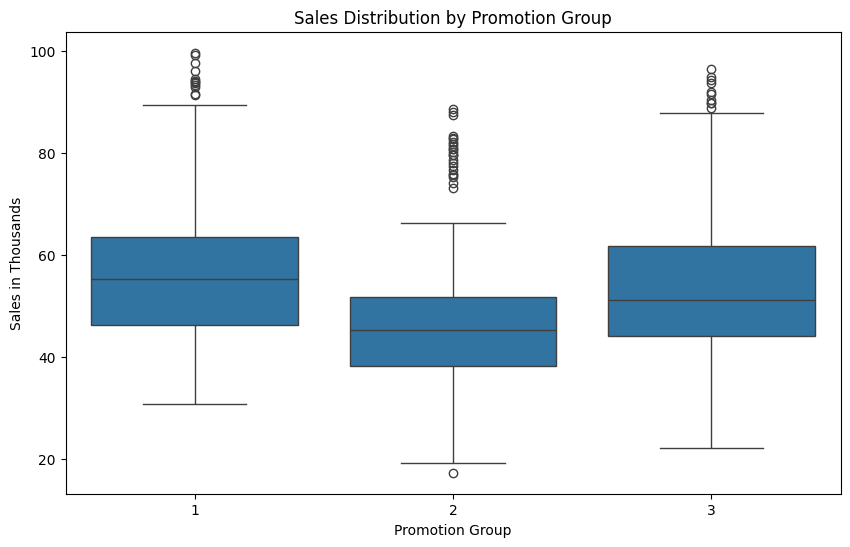

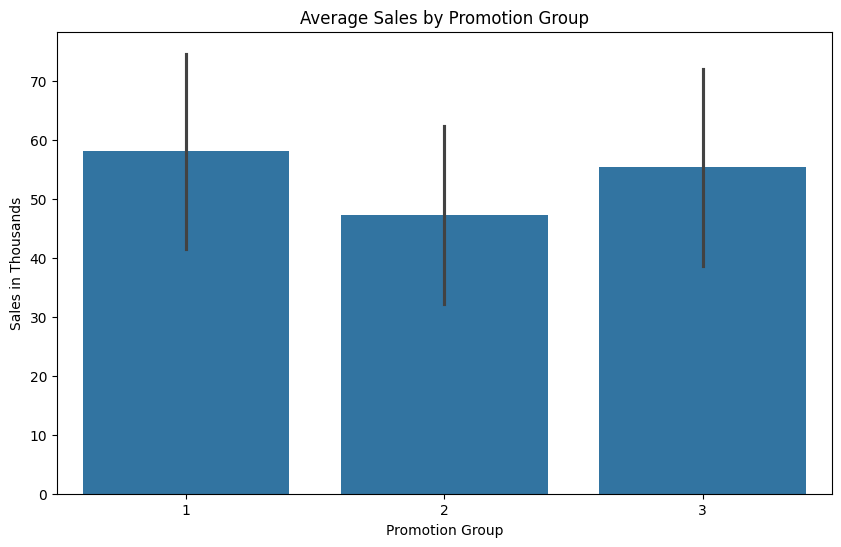

In [15]:
from scipy.stats import f_oneway

# Promotion에 따라 그룹별로 Sales 추출
sales_group1 = df[df['Promotion'] == 1]['SalesInThousands']
sales_group2 = df[df['Promotion'] == 2]['SalesInThousands']
sales_group3 = df[df['Promotion'] == 3]['SalesInThousands']

# ANOVA 분석 수행
f_statistic, p_value = f_oneway(sales_group1, sales_group2)

# 결과 출력
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# 유의수준 설정 (예: 0.05)
alpha = 0.05

# p-value와 유의수준 비교
if p_value < alpha:
    print("유의한 차이가 있습니다. 대체 가설을 채택합니다.")
else:
    print("유의한 차이가 없습니다. 귀무 가설을 채택합니다.")

#대체 가설을 채택하는 것이기 때문에, sales_group1,2,3은 평균에 대해 유의한 차이가 있다고 할 수 있습니다.

# 그룹별 평균과 표준 편차 계산
group_means = df.groupby('Promotion')['SalesInThousands'].mean()
group_std = df.groupby('Promotion')['SalesInThousands'].std()

# 박스 플롯 그리기
plt.figure(figsize=(10, 6))
sns.boxplot(x='Promotion', y='SalesInThousands', data=df)
plt.title('Sales Distribution by Promotion Group')
plt.xlabel('Promotion Group')
plt.ylabel('Sales in Thousands')
plt.show()

# 평균과 신뢰 구간을 포함하는 막대 그래프 그리기
plt.figure(figsize=(10, 6))
sns.barplot(x='Promotion', y='SalesInThousands', data=df, ci='sd')
plt.title('Average Sales by Promotion Group')
plt.xlabel('Promotion Group')
plt.ylabel('Sales in Thousands')
plt.show()

In [10]:
# ANOVA 분석 수행
f_statistic, p_value = f_oneway(sales_group2, sales_group3)

# 결과 출력
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# 유의수준 설정 (예: 0.05)
alpha = 0.05

# p-value와 유의수준 비교
if p_value < alpha:
    print("유의한 차이가 있습니다. 대체 가설을 채택합니다.")
else:
    print("유의한 차이가 없습니다. 귀무 가설을 채택합니다.")

F-statistic: 23.827994797963928
p-value: 1.5628943036276646e-06
유의한 차이가 있습니다. 대체 가설을 채택합니다.


In [11]:
# ANOVA 분석 수행
f_statistic, p_value = f_oneway(sales_group1, sales_group3)

# 결과 출력
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# 유의수준 설정 (예: 0.05)
alpha = 0.05

# p-value와 유의수준 비교
if p_value < alpha:
    print("유의한 차이가 있습니다. 대체 가설을 채택합니다.")
else:
    print("유의한 차이가 없습니다. 귀무 가설을 채택합니다.")

F-statistic: 2.418455345894196
p-value: 0.12079667272314257
유의한 차이가 없습니다. 귀무 가설을 채택합니다.


     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower    upper  reject
-------------------------------------------------------------
Promotion1 Promotion2 -10.7696    0.0 -14.7738 -6.7654   True
Promotion1 Promotion3  -2.7345 0.2444  -6.7388  1.2697  False
Promotion2 Promotion3   8.0351    0.0   4.1208 11.9493   True
-------------------------------------------------------------


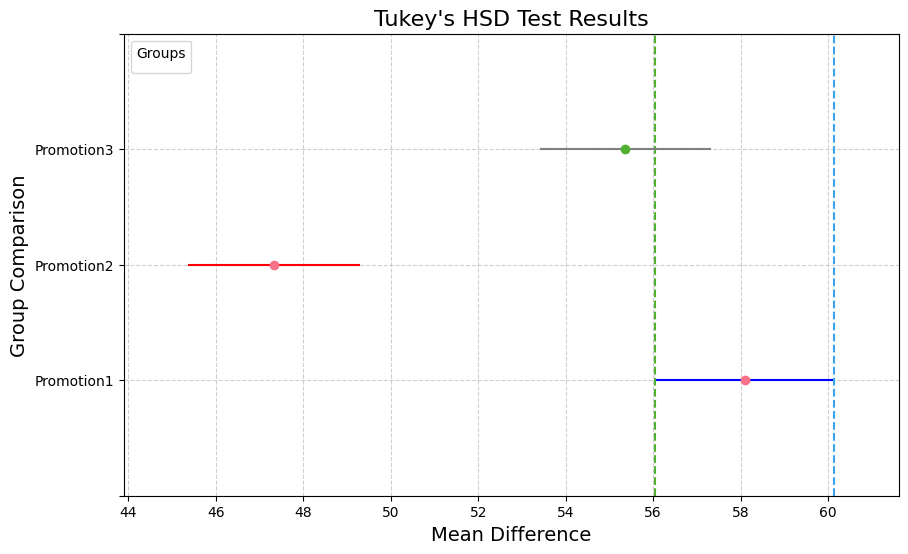

In [19]:
import pandas as pd
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

# 예제 데이터 생성 (실제 데이터로 대체해야 함)
# sales_group1, sales_group2, sales_group3는 각각의 프로모션 그룹의 매출 데이터
data = {
    'Sales': np.concatenate([sales_group1, sales_group2, sales_group3]),
    'Promotion': ['Promotion1'] * len(sales_group1) + ['Promotion2'] * len(sales_group2) + ['Promotion3'] * len(sales_group3)
}

df = pd.DataFrame(data)

# Tukey's HSD 검정 수행
tukey = pairwise_tukeyhsd(endog=df['Sales'], groups=df['Promotion'], alpha=0.05)

# 결과 출력
print(tukey)

# Tukey's HSD 결과를 시각화
fig, ax = plt.subplots(figsize=(10, 6))

# 기본 그래프
tukey.plot_simultaneous(ax=ax, comparison_name='Promotion1')

# 추가적인 스타일링
ax.set_title('Tukey\'s HSD Test Results', fontsize=16)
ax.set_xlabel('Mean Difference', fontsize=14)
ax.set_ylabel('Group Comparison', fontsize=14)

# 색상 팔레트 설정
colors = sns.color_palette("husl", 3)
for i, line in enumerate(ax.get_lines()):
    line.set_color(colors[i % len(colors)])

# 그리드 추가
ax.grid(True, linestyle='--', alpha=0.6)

# 평균 차이선 그리기
mean_diffs = tukey.meandiffs
for i, mean_diff in enumerate(mean_diffs):
    ax.plot([mean_diff, mean_diff], [i-0.4, i+0.4], color=colors[i % len(colors)], linestyle='--')

# 범례 추가
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Groups', loc='best')

plt.show()